# Encoding via Color Palettes

Color is a very common encoding for variables, for **both qualitative and quantitative variables**. Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.



In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])


sample = np.random.choice(df.shape[0], 200, replace = False)
subset_df = df.loc[sample]

If you have a **qualitative variable**, you can set different colors for different levels of a categorical variable through the **"hue"** parameter on seaborn's **FacetGrid** class.

Transmimission type is a **nominal variable** so **the qualitative palette** works great

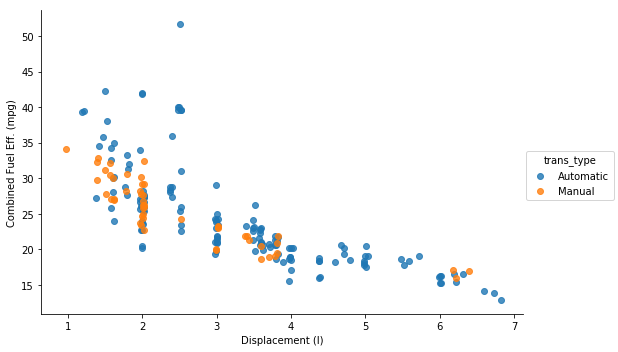

In [9]:
q = sb.FacetGrid(data = subset_df, hue='trans_type', size = 5, aspect = 1.5,
                hue_order = ['Automatic','Manual'])
q.map(sb.regplot, 'displ', 'comb', x_jitter = 0.03, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
q.add_legend()

If we plot by VClass instead?

Vclass is **an ordered variable** and the qualitative palette does not work quite as well we should specify **a sequential palette** instead

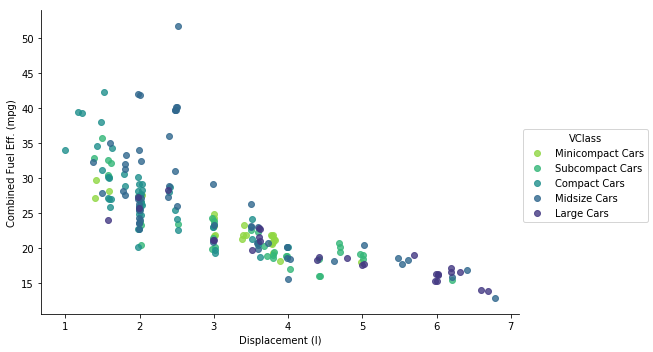

In [11]:
q = sb.FacetGrid(data = subset_df, hue='VClass',
                size = 5, aspect = 1.5, palette = 'viridis_r')
q.map(sb.regplot, 'displ', 'comb', x_jitter = 0.03, fit_reg = False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
q.add_legend()


For **quantitative variables** (like co2), we should not take the same approach, since **FacetGrid** expects any variable input for subsetting to be categorical. Instead, we can set color based on numeric value in the **scatter function** through the **"c"** parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

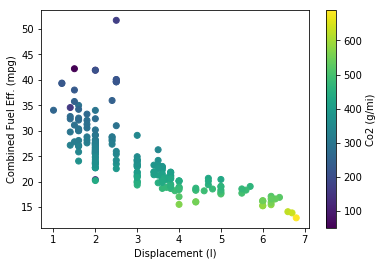

In [14]:
plt.scatter( data = subset_df, x = 'displ', y = 'comb', c='co2')
plt.colorbar(label='Co2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

As we saw before, when points lie further away from the central line through the data, the value on the third variable decreases. Compared to the size encoding, we have a more precise idea of value on the third variable, though certainly not as precise as positional encodings.

# Color Palettes


Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: 

* qualitative
* sequential
* diverging.

**Qualitative palettes are built for nominal-type data**. This is the palette class taken by the default palette.

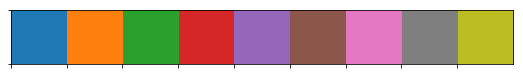

In [15]:
sb.palplot(sb.color_palette(n_colors=9))

In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

For other types of data **(ordinal and numeric)**, a choice may need to be made between **a sequential scale and a diverging scale**. In **a sequential palette**, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The **default sequential color map**, **"viridis"**, takes the opposite approach, with dark colors indicating low values, and light values indicating high.

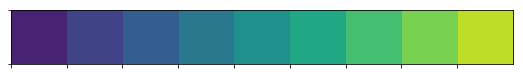

In [16]:
sb.palplot(sb.color_palette('viridis',9))

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is **a meaningful zero or center value** for the variable, you may want to consider using **a diverging palette**. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

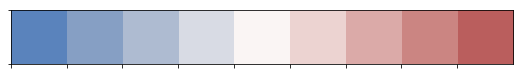

In [17]:
sb.palplot(sb.color_palette('vlag', 9))

# Selecting Color Palettes

If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. [This part](https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib) of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:



   * Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
   * Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
   * Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)


For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

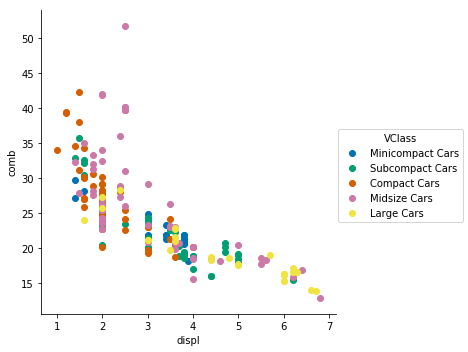

In [18]:
g = sb.FacetGrid(data = subset_df, hue = 'VClass', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'displ', 'comb')
g.add_legend()

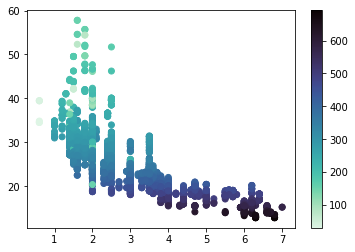

In [19]:
plt.scatter(data = df, x = 'displ', y = 'comb', c = 'co2',
            cmap = 'mako_r')
plt.colorbar()

When using a diverging color palette, you will likely need to specify the **"vmin" and "vmax"** parameters in order to have the neutral point in the palette meet the center point in the scale. Alternatively, solutions that create a different normalization function like the one posted in this [Stack Overflow thread](https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib) can be used for finer control over the color map. Diverging color scales are common enough for the **heatmap** type that there is a "center" parameter for setting the central value. You'll see a demonstration of this later in the lesson ("Plot Matrices").

# Warnings on Color

There are a couple of things to be aware of in general, when working with color. First of all, try and consider color blindness when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness sim like [this one](http://www.color-blindness.com/coblis-color-blindness-simulator/).

Secondly, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

([], <a list of 0 Text yticklabel objects>)

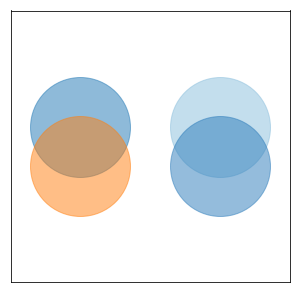

In [24]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sb.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sb.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sb.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sb.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([])